Classical MDS:


距离阵D为欧式的，即存在摸个正整数P以及 $R^P$ 空间的n个点$x_1,\cdots, x_n$ 使得 $d_{ij}^2 = \Arrowvert x_i - x_j \Arrowvert ^2
, i,j = 1, \cdots, n$. 目标在于： 寻找D的构图 $x_1, \cdots, x_n$,其想法为：
* 将平方欧氏距离 $D = (d_{ij}^2)$ 变换为一个非负定矩阵 $B, B= -\frac{1}{2}HDH,$ where $H = I_n - \frac{1}{n}$
* 由B的特征值和特征向量得到构图X， X的每行表示低维空间的点.

In [30]:
import numpy as np

D=np.array([[0,411,213,219,296,397],
            [411,0,204,203,120,152],
            [213,204,0,73,136,245],
            [219,203,73,0,90,191],
            [296,120,136,90,0,109],
            [ 397,152,245,191,109,0]])

N = D.shape[0]
T = np.zeros((N,N))
D2 = D**2

H = np.eye(N) - 1/N

T = -0.5*np.dot(np.dot(H,D2),H)

eigVal,eigVec = np.linalg.eig(T) 
X = np.dot(eigVec[:,:2],np.diag(np.sqrt(eigVal[:2]))) 

print('original distance','\tnew distance')
for i in range(N):
    for j in range(i+1,N):
        print(np.str(D[i,j]),'\t\t',np.str("%.4f"%np.linalg.norm(X[i]-X[j])))

original distance 	new distance
411 		 411.0730
213 		 213.3703
219 		 216.1111
296 		 299.8839
397 		 396.5059
204 		 206.0970
203 		 200.8076
120 		 132.0087
152 		 151.6636
73 		 76.6109
136 		 132.5989
245 		 246.1059
90 		 84.4350
191 		 190.9788
109 		 113.5375


(10, 10)


C:\Users\liuliyian\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


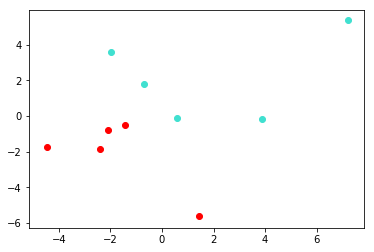

In [33]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

data = np.array([(5,0,0,0,0,1,0,2,1,0),
                 (0,0,3,0,3,0,1,0,0,1),
                 (2,0,0,0,0,0,1,0,0,0),
                 (1,0,1,0,2,0,0,0,0,1),
                 (5,0,2,0,0,4,2,2,3,7),
                 (0,3,0,1,0,0,0,0,0,0),
                 (0,0,0,6,0,0,0,0,0,1),
                 (0,5,0,0,0,0,0,0,0,0),
                 (0,1,0,0,0,0,0,0,0,0),
                 (0,2,0,0,0,0,0,0,0,0)])

print(data.shape)
index = ['auto1','auto2','auto3','auto4','auto5','moto1','moto2','moto3','moto4','moto5']
columns = ['car','bike','cars','his','tires','she','ive','her','#k','are']
Word = pd.DataFrame(data,index,columns)

mds = MDS()
mds.fit(data)
a = mds.embedding_
plt.scatter(a[0:5,0],a[0:5,1],color='turquoise')
plt.scatter(a[5:10,0],a[5:10,1],color='red')
plt.show()

In [74]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
print(len(X_true))
print(X_true)

X_true = X_true.reshape((n_samples, 2))

# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)
print(X_true.shape)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T

noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0

similarities += noise


Automatically created module for IPython interactive environment
40
[10.  3.  8.  0. 19. 10. 11.  9. 10.  6.  0. 12.  7. 14. 17.  2.  2.  1.
 19.  5.  8. 14.  1. 10.  7. 11.  1. 15. 16.  5. 17. 14.  0.  0.  9. 18.
  5.  7.  5. 14.]
(20, 2)
(20, 20)


C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


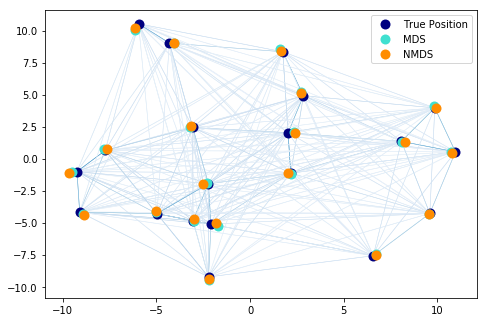

In [78]:

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()

C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
